In [1]:
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib
import cycler

from scipy.stats import norm

In [47]:
def matplotlib_setup():
    matplotlib.rc('mathtext', fontset='cm')

    font = {
        'family':'serif', 
        'weight':'normal', 
        'size':8
    }
    matplotlib.rc('font', **font)

    legend = {
        'markerscale':1, 
        'labelspacing':0.3, 
        'borderpad':0.2, 
        'handletextpad':0.4,
        'columnspacing':1.2
    }
    matplotlib.rc('legend', **legend)

    axes_prop_cycle = {
        'markersize':[3]*20,
        #'markeredgewidth':[.8]*20,
        #'markeredgecolor':['w']*20,
        'linewidth':[1.]*20,
#         'linestyle':['-', '--', '-.', ':']*5,
#         'marker':['o', 'X', 's', 'P', 'D']*4,
        'color':sns.color_palette("Set1", 20)
    }

    matplotlib.rc('axes', prop_cycle=cycler.cycler(**axes_prop_cycle))


def get_ecdf(sample):
    ecdf = []
    for x in sample:
        ecdf.append(sum(sample < x)/float(len(sample)))
    
    return np.array(ecdf)


def get_Dxy(ref_dist, sample):
    ecdf = get_ecdf(sample)
    ks_values = ecdf - ref_dist.cdf(sample)

    D_pos = np.argmax(ks_values)
    D_neg = np.argmin(ks_values)

    x1 = sample[D_pos]
    x2 = sample[D_neg]

    y1 = ecdf[np.where(sample == x1)[0][0]]
    y2 = ecdf[np.where(sample == x2)[0][0]]

    return x1, x2, y1, y2


N = 1000
ref_dist = norm(0, 1)
sample_dist = norm(0, 1.5)

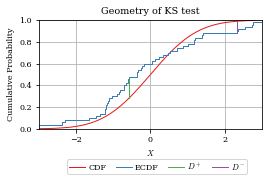

In [54]:
matplotlib_setup()

ref_sample = ref_dist.rvs(size=N)

x_cdf = np.sort(ref_sample)
y_cdf = ref_dist.cdf(x_cdf)

fig_size = np.array([1.,.5])*4.
plt.subplots(figsize=fig_size)

plt.plot(x_cdf, y_cdf, label='CDF')

dist_sample = sample_dist.rvs(size=int(N/20.0))

sns.ecdfplot(x=dist_sample)

plt.title('Geometry of KS test')
plt.ylabel('Cumulative Probability')
plt.xlabel(r'$X$')
plt.xticks([-2, 0, 2])

x1, x2, y1, y2 = get_Dxy(ref_dist, dist_sample)

plt.plot([x1, x1], [ref_dist.cdf(x1), y1], label='D+')
plt.plot([x2, x2], [ref_dist.cdf(x2), y2], label='D-')
plt.xlim(-3, 3)

plt.legend(labels=["CDF","ECDF",r'$D^+$',r'$D^-$'], loc='lower center', ncol=5, bbox_to_anchor=(0.53, -0.45))
plt.grid(True)
plt.savefig('../data_pdf_files/ks_test.pdf', bbox_inches='tight')
plt.show()

#!cp ../data_pdf_files/ks_test.pdf ../../jcs2022/fig